In [1]:
using LinearAlgebra
using Random
using Printf
using Plots

In [2]:
n = 128
println("Size of matrix ", n)

# Initialize the matrix
F = qr(rand(n,n))
Qe = Matrix(F.Q)
Re = F.R
# Qe is orthogonal, Re is upper triangular
for i = 1 : n
    # Multiply row i by 1/2^i
    Re[i,:] = 1.0/2.0^(i-1) * Re[i,:]
end

@printf "Qe should be orthogonal; let's check: %g\n" norm(transpose(Qe)*Qe - UniformScaling(1.0))

A = Qe * Re

# Compute QR factorization of A
F = qr(A)
Q = Matrix(F.Q)
R = F.R

@printf "Q is also orthogonal: %g\n" norm(transpose(Q)*Q - UniformScaling(1.0))

# Fix possible differences in the sign of the diagonal entries of R
for i = 1 : n
    if R[i,i] * Re[i,i] < 0
        R[i,:] = -R[i,:]
        Q[:,i] = -Q[:,i]
    end
end

# We now expect that Q=Qe and R=Re.

# Calculate the error in Q
err = zeros(n)
for j = 1 : n
    # Processing column j
    err[j] = norm(Q[:,j] - Qe[:,j])
end

Size of matrix 128
Qe should be orthogonal; let's check: 1.06528e-14
Q is also orthogonal: 1.06814e-14


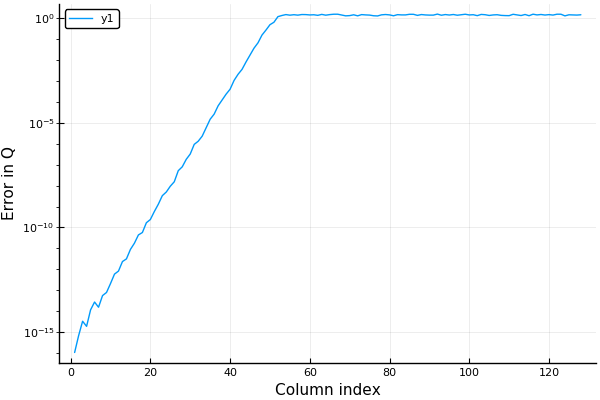

In [3]:
pyplot()

# Plot the error in Q
plot(err, yscale=:log10)
xlabel!("Column index")
ylabel!("Error in Q")